In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np

# Read data

In [21]:
data = pd.read_csv('../datasets/preprocessed/aux.csv', sep=',', na_values="NA")

In [22]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,YrSold,SaleType,SaleCondition,SalePrice,Remod,MasVnr,SecondFloor,Baths,Porch,Pool
0,1,F,RL,8450,1,Lvl,Inside,2,CollgCr,Norm,...,2008,WD,Normal,208500,0,1,1,4.0,True,0
1,2,A,RL,9600,1,Lvl,FR,2,Veenker,Feedr,...,2007,WD,Normal,181500,0,0,0,3.0,True,0
2,3,F,RL,11250,0,Lvl,Inside,2,CollgCr,Norm,...,2008,WD,Normal,223500,1,1,1,4.0,True,0
3,4,G,RL,9550,0,Lvl,Corner,2,Crawfor,Norm,...,2006,WD,Abnorml,140000,1,0,1,2.0,True,0
4,5,F,RL,14260,0,Lvl,FR,2,NoRidge,Norm,...,2008,WD,Normal,250000,0,1,1,4.0,True,0


# Prediction preprocessing

Attribute distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc513e29d90>]],
      dtype=object)

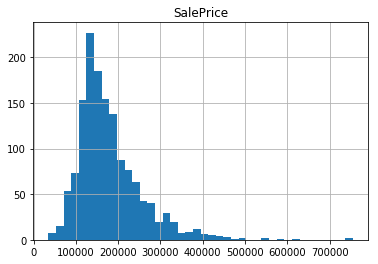

In [23]:
data.hist(column=['SalePrice'],bins=40)

Correlation with the numerical features

In [24]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,ExterQual,ExterCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,Fence,MiscVal,MoSold,YrSold,SalePrice,Remod,MasVnr,SecondFloor,Baths,Porch,Pool
Id,1,0.007891,0.0262232,-0.0173787,-0.0274566,0.0158156,-0.0135,0.00508265,0.0229088,-0.021039,-0.0159856,0.00842849,0.00278489,0.0315607,0.00400698,0.0156963,0.0233303,-0.0153073,0.011482,-0.00786533,-0.00478699,0.0249726,0.000160302,-0.0180422,-0.00326319,-0.030488,0.0131367,0.00331783,-0.0164871,0.0456776
LotArea,0.007891,1,-0.296645,-0.13716,0.200537,-0.00216573,0.055123,0.120403,0.0531529,0.306768,0.0649823,0.0883805,0.411236,0.272712,-0.01758,0.144065,0.371111,0.309379,0.313736,-0.0117731,0.0524273,0.00327945,-0.0292296,0.397501,0.0134632,0.0645678,0.0184998,0.231252,0.0542975,0.109555
LotShape,0.0262232,-0.296645,1,0.0797316,-0.192165,0.0207372,-0.23764,-0.179951,-0.0218883,-0.171709,-0.112948,-0.109862,-0.173298,-0.0523933,0.0989272,-0.161861,-0.116574,-0.183448,-0.165498,0.05423,-0.0390776,-0.0305964,0.0389866,-0.253844,0.0767593,-0.0839649,0.00934483,-0.204288,-0.0753308,-0.0190507
LandSlope,-0.0173787,-0.13716,0.0797316,1,0.0710052,-0.0164369,0.0745948,0.0881848,0.049317,0.0116071,0.0566508,0.0269561,-0.0232451,0.0579374,0.0310318,0.0425329,0.0471593,-0.0500113,0.0263989,0.0224896,0.01318,-0.01551,0.00433658,-0.00555923,-0.0334632,0.0664942,0.000840034,-0.0316742,0.0101659,0.0135396
OverallQual,-0.0274566,0.200537,-0.192165,0.0710052,1,-0.0933079,0.572776,0.72565,0.0146595,0.541159,0.462246,0.273674,0.59008,0.105367,-0.186337,0.672796,0.422824,0.403153,0.566446,-0.189804,-0.0305434,0.0662214,-0.0256773,0.802103,-0.0855033,0.399926,0.170042,0.524192,0.320622,0.0507051
OverallCond,0.0158156,-0.00216573,0.0207372,-0.0164369,-0.0933079,1,-0.377204,-0.138883,0.399191,-0.171178,-0.0178912,0.120046,-0.0770683,0.0104304,-0.0817284,-0.0269994,-0.0566485,-0.018541,-0.143839,0.17067,0.0678149,-0.00783574,0.0407913,-0.0795692,0.310242,-0.156992,0.0564061,-0.147581,0.00419926,-0.00461431
YearBuilt,-0.0135,0.055123,-0.23764,0.0745948,0.572776,-0.377204,1,0.597526,-0.105721,0.404718,0.448432,0.384254,0.195531,-0.0694247,-0.175412,0.527791,0.0912518,0.152583,0.483743,-0.229513,-0.0341176,0.0113243,-0.0132269,0.534111,-0.417512,0.427283,-0.102802,0.509805,0.15857,-0.00667129
ExterQual,0.00508265,0.120403,-0.179951,0.0881848,0.72565,-0.138883,0.597526,1,0.010965,0.471418,0.521675,0.206853,0.42323,-0.0237798,-0.156682,0.713758,0.284095,0.252306,0.497859,-0.256678,-0.0395582,0.0431032,-0.00702661,0.6968,-0.0736763,0.34986,0.0643295,0.442293,0.257636,0.0120567
ExterCond,0.0229088,0.0531529,-0.0218883,0.049317,0.0146595,0.399191,-0.105721,0.010965,1,-0.00785749,0.0566616,0.094416,0.0139521,0.0103008,-0.0498331,0.0608231,-0.00205233,0.033665,0.0138662,0.0586925,0.0526807,0.029364,0.0142001,0.0126358,0.0888526,-0.0497361,0.0181046,0.0246154,0.0465013,0.0462121
TotalBsmtSF,-0.021039,0.306768,-0.171709,0.0116071,0.541159,-0.171178,0.404718,0.471418,-0.00785749,1,0.279104,0.216998,0.400506,0.051035,-0.0761616,0.437668,0.263809,0.316871,0.474241,-0.114704,-0.0191952,0.0261946,-0.00914897,0.648644,-0.087232,0.34781,-0.337334,0.315701,0.1847,0.0445519


We delete the columns with low correlation with SalePrice

In [25]:
#Low correlation with SalePrice
data.drop(columns=['LandSlope'],inplace=True)
data.drop(columns=['OverallCond'],inplace=True)
data.drop(columns=['ExterCond'],inplace=True)
data.drop(columns=['MoSold'],inplace=True)
data.drop(columns=['YrSold'],inplace=True)
data.drop(columns=['Remod'],inplace=True)

There are no pairs of features with a correlation above 0.9

We convert the feature to predict to categorical

In [26]:
def conversion(row):
    value = row['SalePrice']
    if value < 50000: result = 'Level1'
    elif value < 75000: result = 'Level2'
    elif value < 100000: result = 'Level3'        
    elif value < 125000: result = 'Level4'
    elif value < 150000: result = 'Level5'
    elif value < 175000: result = 'Level6'
    elif value < 200000: result = 'Level7'
    elif value < 225000: result = 'Level8'
    elif value < 250000: result = 'Level9'
    elif value < 275000: result = 'Level10'
    elif value < 300000: result = 'Level11'
    elif value < 325000: result = 'Level12'
    elif value < 350000: result = 'Level13'
    elif value < 375000: result = 'Level14'
    elif value < 400000: result = 'Level15'
    elif value < 425000: result = 'Level16'
    elif value < 4750000: result = 'Level17'
    else: result = 'Level18'
    return result

data['SalePrice'] = data.apply(conversion, axis=1)
data['SalePrice'].value_counts()

Level5     313
Level6     209
Level7     195
Level4     187
Level8     114
Level9      90
Level3      90
Level10     67
Level11     40
Level12     34
Level13     24
Level2      19
Level17     18
Level15     14
Level14     12
Level16      7
Level1       5
Name: SalePrice, dtype: int64

Normalize numerical variables

In [27]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        type_ = df[feature_name].dtype
        if type_ == 'int64' or type_ == 'float64':
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            # max_value != min_value
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

data = normalize(data)

# Save preprocessed dataset

In [28]:
data.to_csv('../datasets/preprocessed/train.csv', index = None, header=True)